# Application Setup

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import SimpleITK as sitk
from myshow import myshow, myshow3d

# The Algorithm

In [22]:
def get_watershed_on_gradient(img, sigma, level):
    #get feature edge highlighted image
    feature_img = sitk.GradientMagnitudeRecursiveGaussian(img, sigma=sigma)

    #get watershed on edge highlighted image
    ws_img = sitk.MorphologicalWatershed(feature_img, level=level, markWatershedLine=False, fullyConnected=False)

    #get connected component of watershed, excluding background pixels
    ws_size = np.shape(sitk.GetArrayFromImage(ws_img))
    seg = sitk.ConnectedComponent(ws_img!=ws_img[ws_size[1] - 1, ws_size[0] - 1])

    #get overlay of original image with connected component
    foreground = sitk.LabelOverlay(img, seg)

    #get inside distance map
    filled = sitk.BinaryFillhole(seg!=0)
    d = sitk.SignedMaurerDistanceMap(filled, insideIsPositive=False, squaredDistance=False, useImageSpacing=False)

    #get watershed of inside distance map
    ws = sitk.MorphologicalWatershed( d, markWatershedLine=False, level=1)

    #get split objects
    ws = sitk.Mask( ws, sitk.Cast(seg, ws.GetPixelID()))

    #get overlay of original image and split objects (output image)
    output = sitk.LabelToRGB(ws)
    
    return output

# GFP-GOWT1 mouse stem cells Data Set

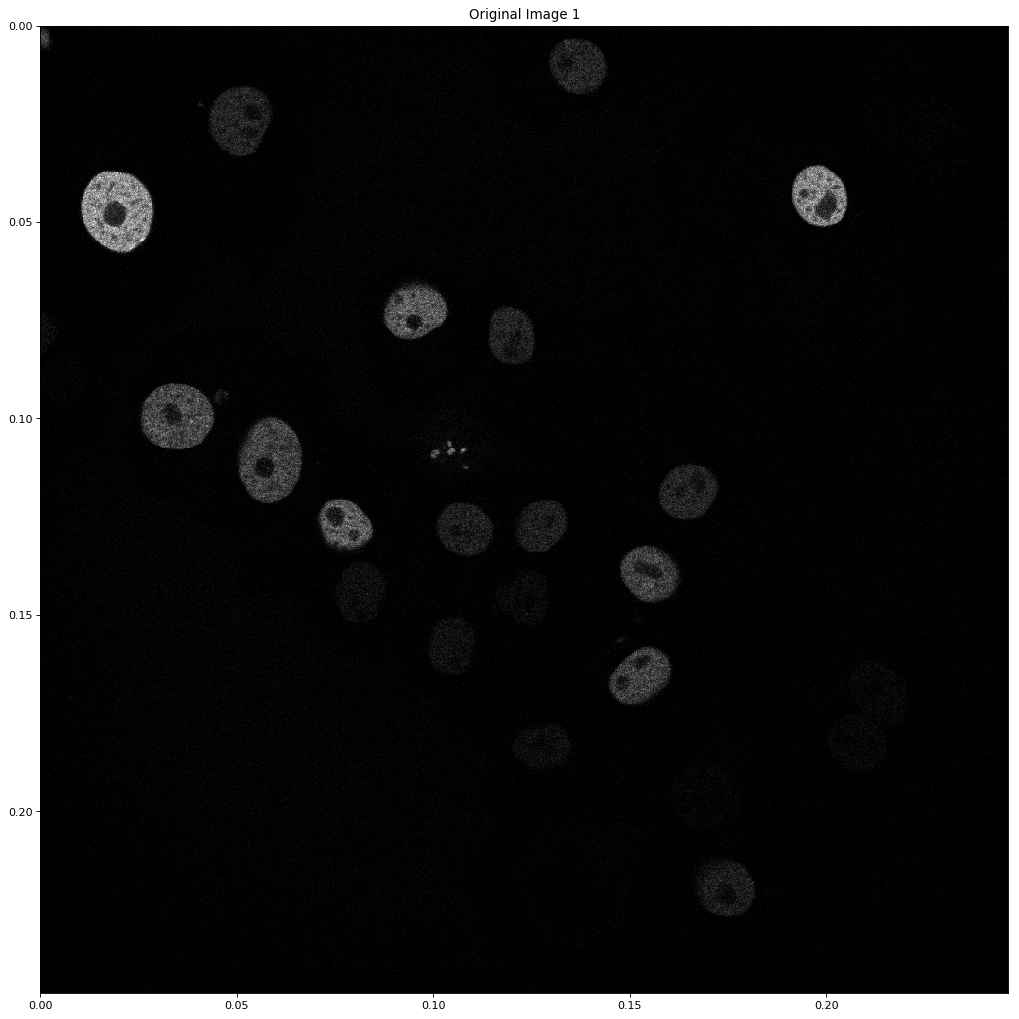

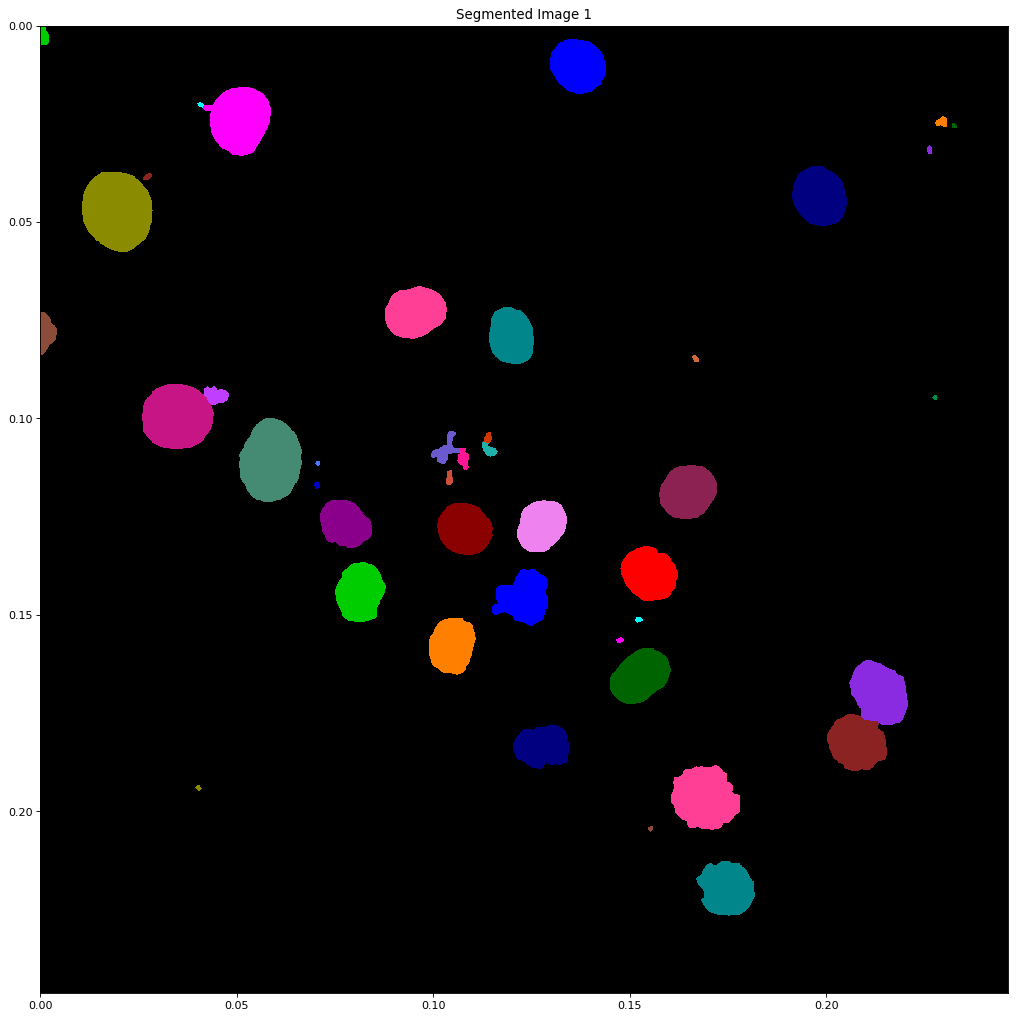

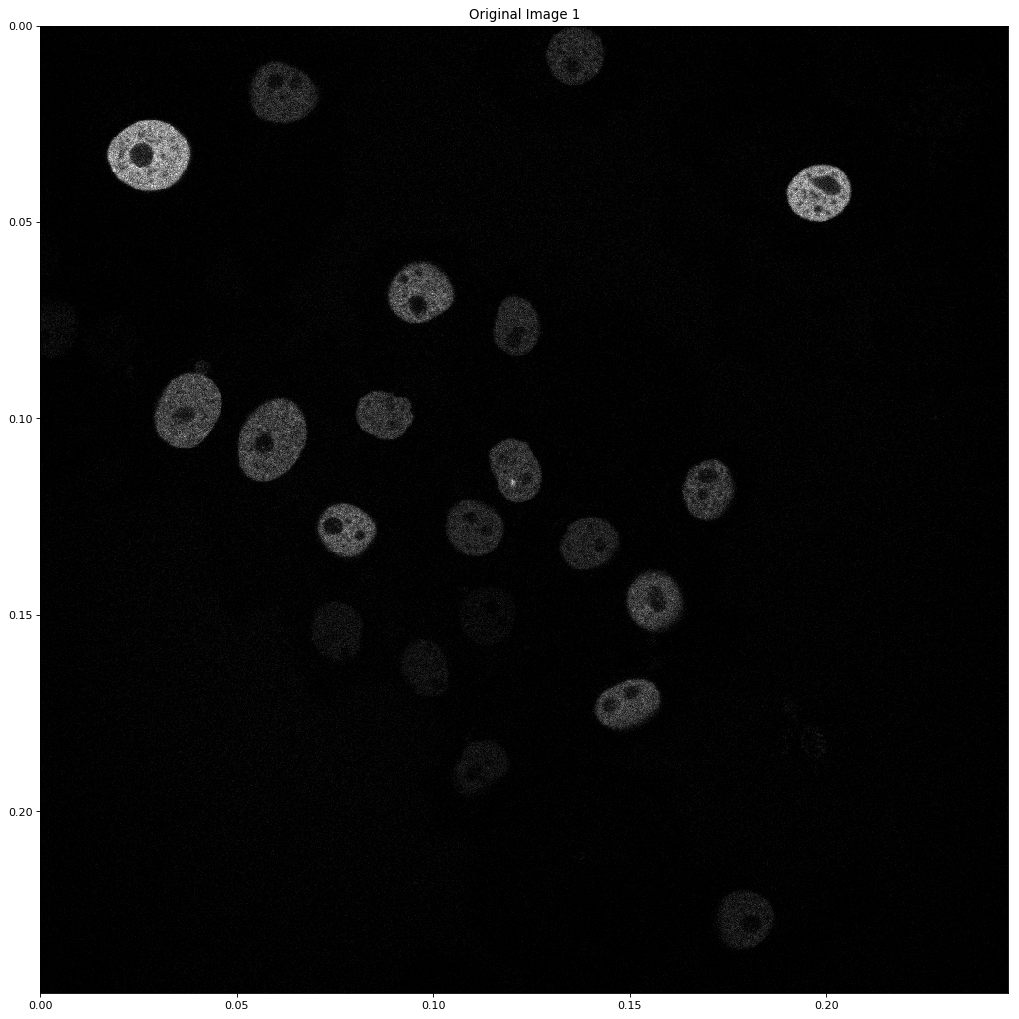

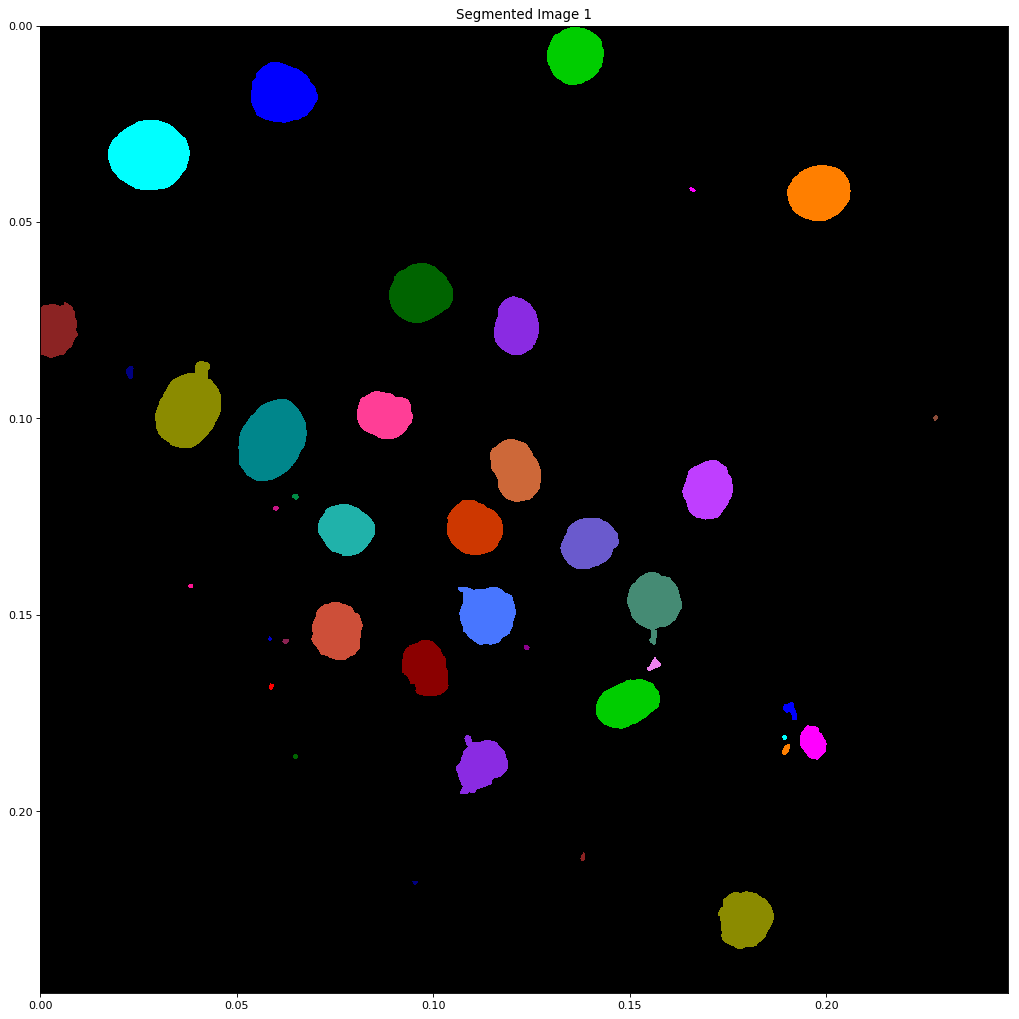

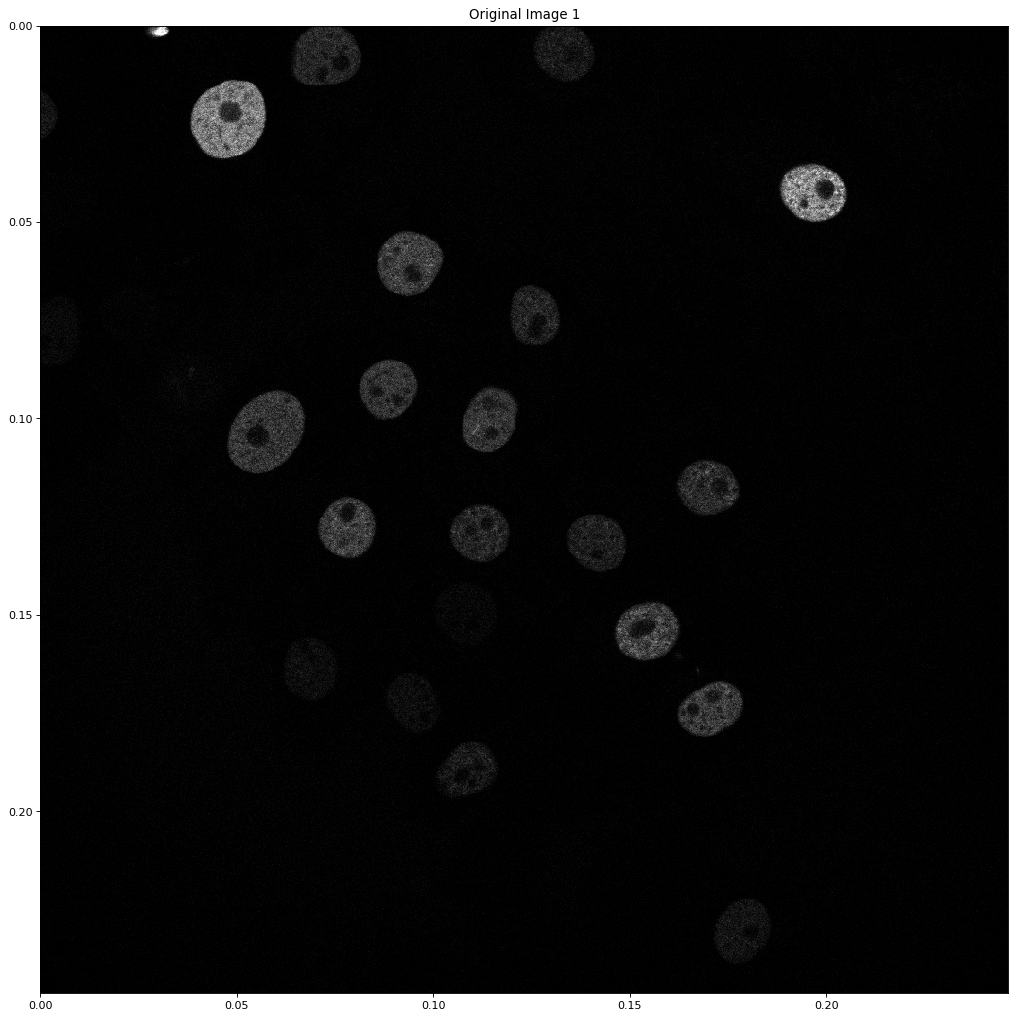

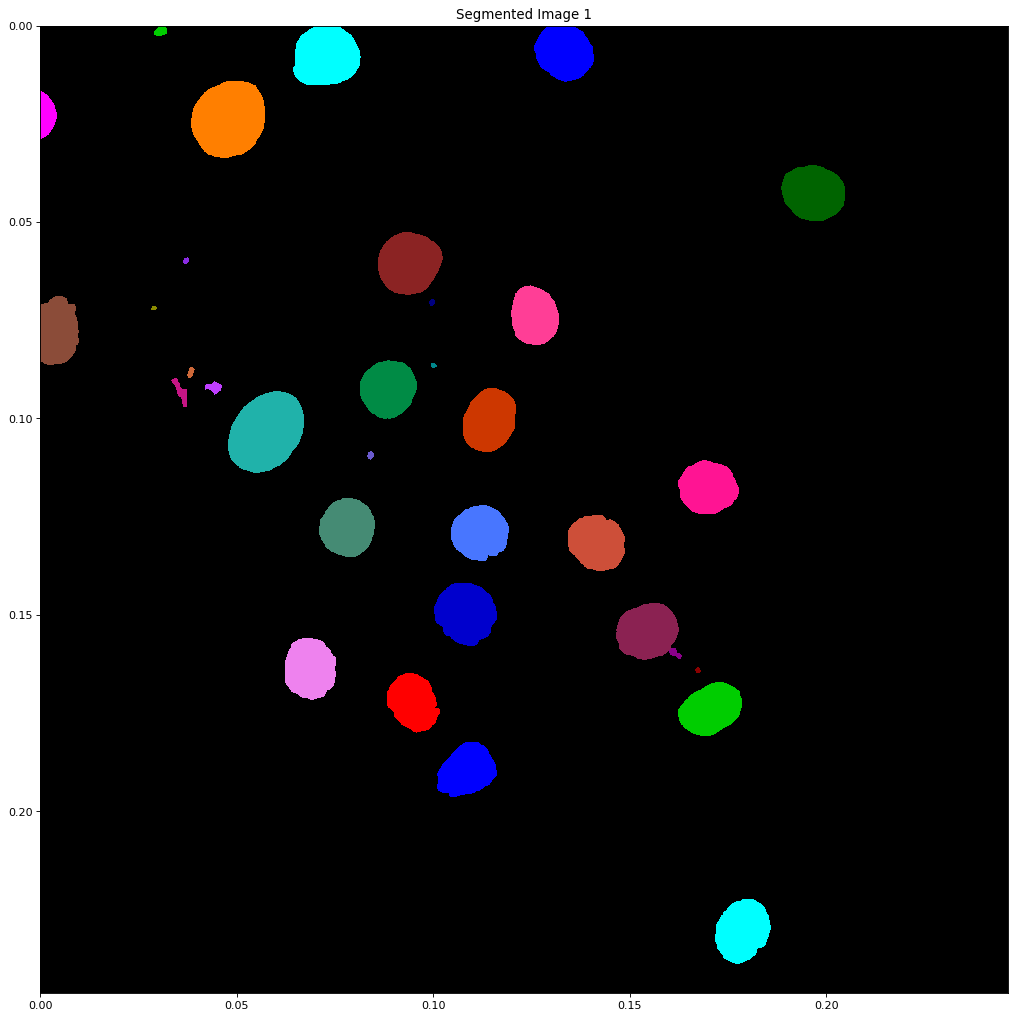

In [28]:
#get image
image_directory = os.path.join(".", "Images")
img1 = sitk.ReadImage(os.path.join(image_directory, "t009_N2DH_GOWT1.tif")) #sigma, level = 0.00056, 875
img2 = sitk.ReadImage(os.path.join(image_directory, "t051_N2DH_GOWT1.tif"))
img3 = sitk.ReadImage(os.path.join(image_directory, "t090_N2DH_GOWT1.tif"))

#set watershed parameters
sigma, level = 0.00056, 875

output1 = get_watershed_on_gradient(img1, sigma, level)
output2 = get_watershed_on_gradient(img2, sigma, level)
output3 = get_watershed_on_gradient(img3, sigma, level)

myshow(img1, "Original Image 1")
myshow(output1, "Segmented Image 1")
myshow(img2, "Original Image 1")
myshow(output2, "Segmented Image 1")
myshow(img3, "Original Image 1")
myshow(output3, "Segmented Image 1")

# HeLa cells stably expressing H2b-GFP Data Set

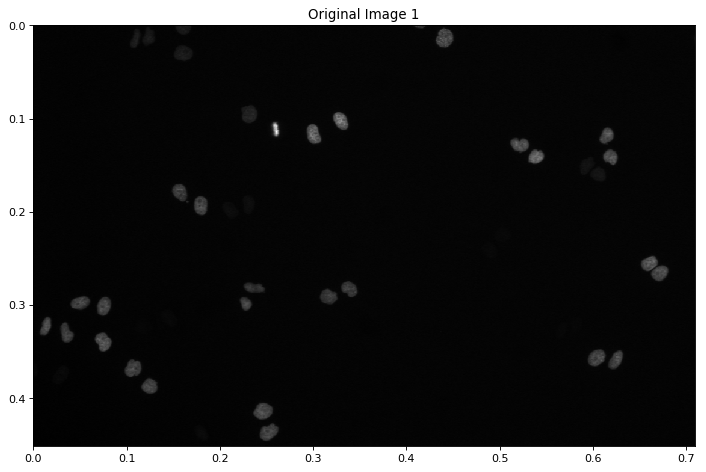

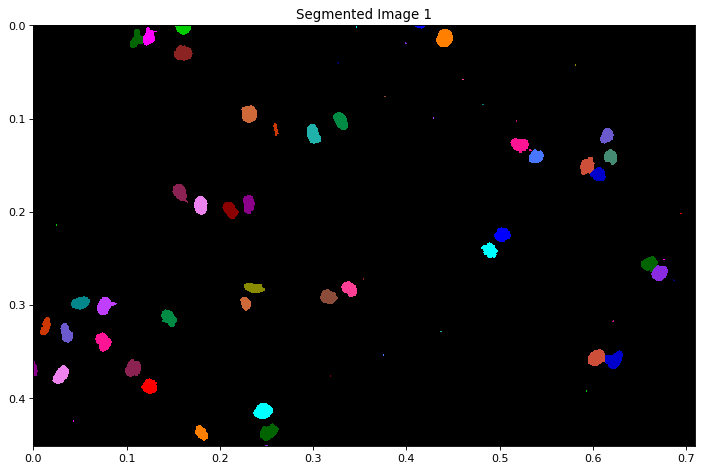

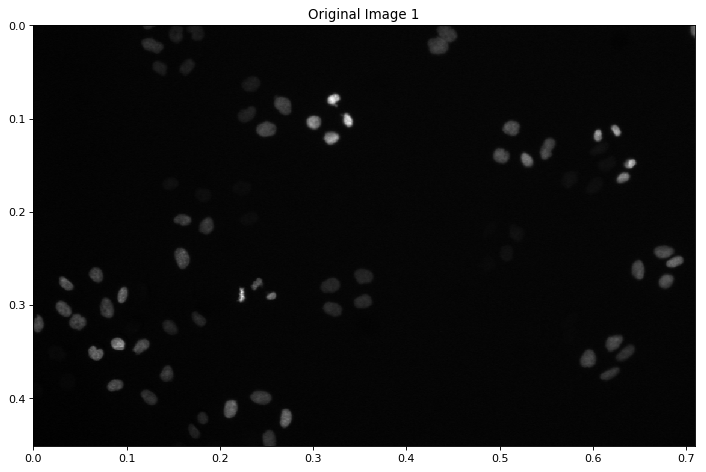

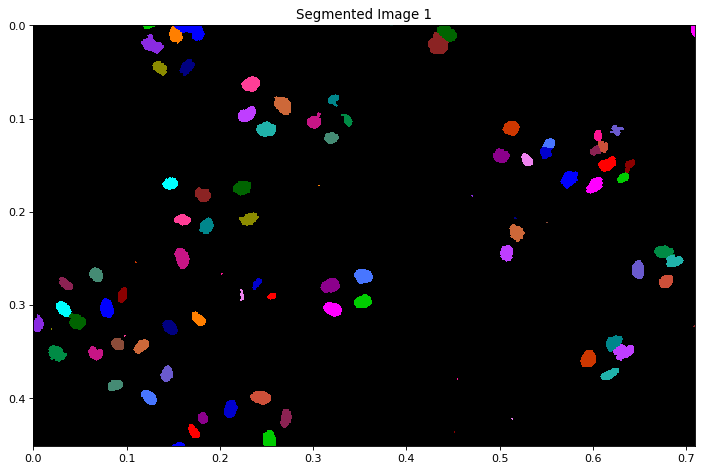

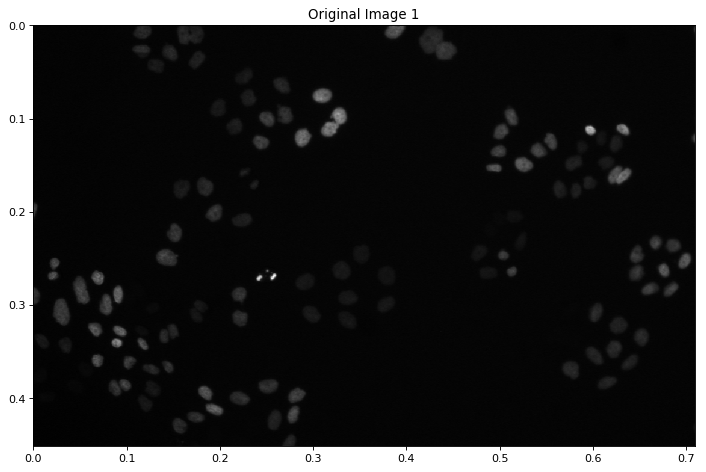

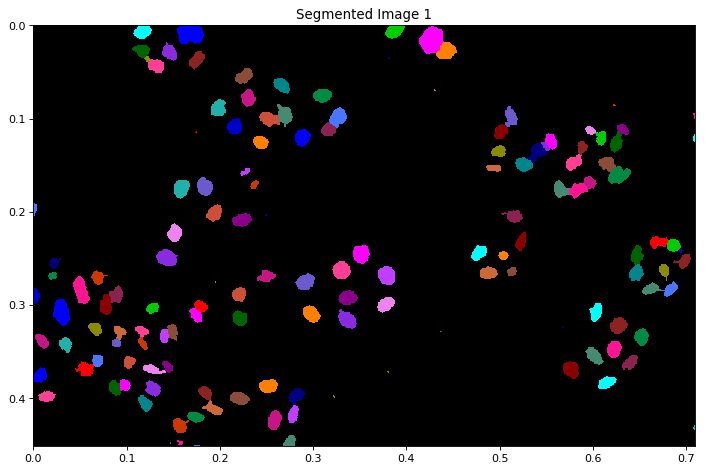

In [29]:
#get image
image_directory = os.path.join(".", "Images")
img1 = sitk.ReadImage(os.path.join(image_directory, "t001_N2DL_HeLa.tif")) #sigma, level = 0.00055, 10000
img2 = sitk.ReadImage(os.path.join(image_directory, "t035_N2DL_HeLa.tif"))
img3 = sitk.ReadImage(os.path.join(image_directory, "t067_N2DL_HeLa.tif"))

#set watershed parameters
sigma, level = 0.00055, 10000

output1 = get_watershed_on_gradient(img1, sigma, level)
output2 = get_watershed_on_gradient(img2, sigma, level)
output3 = get_watershed_on_gradient(img3, sigma, level)

myshow(img1, "Original Image 1")
myshow(output1, "Segmented Image 1")
myshow(img2, "Original Image 1")
myshow(output2, "Segmented Image 1")
myshow(img3, "Original Image 1")
myshow(output3, "Segmented Image 1")

# Pancreatic Stem Cells on a Polystyrene substrate Data Set

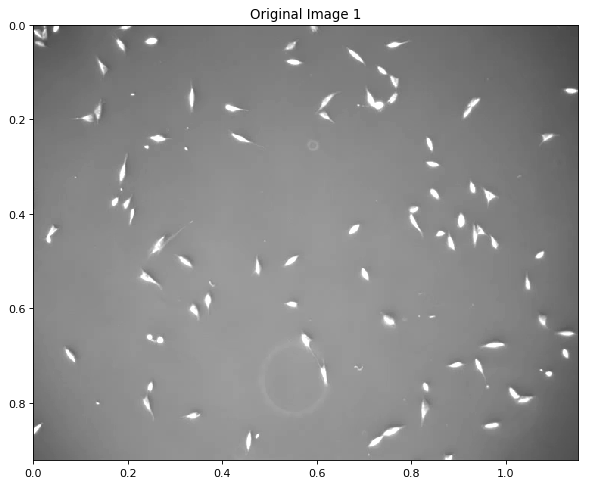

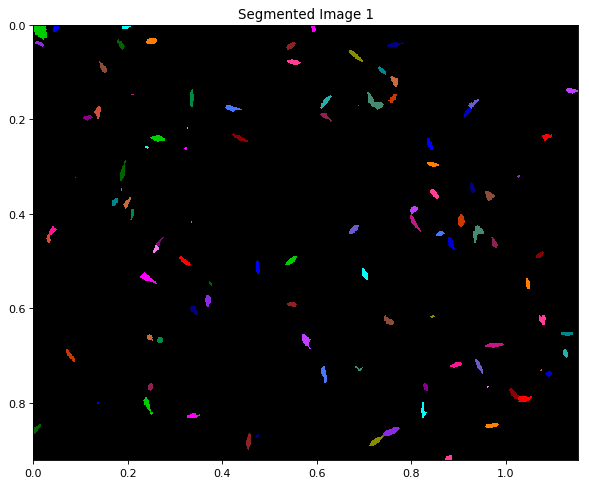

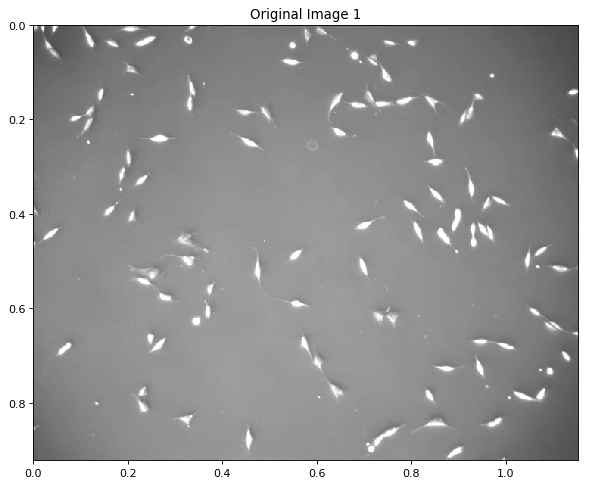

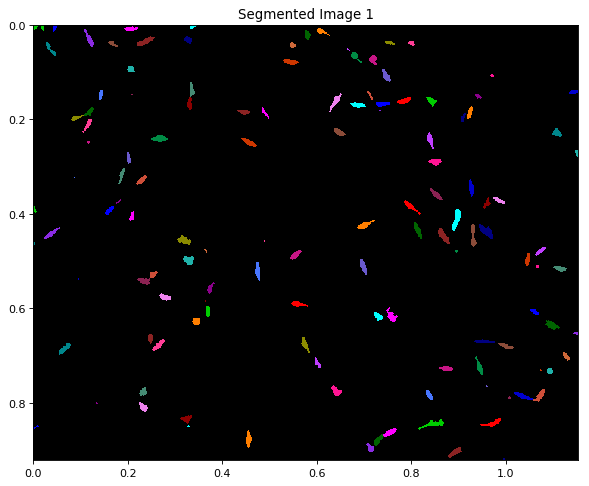

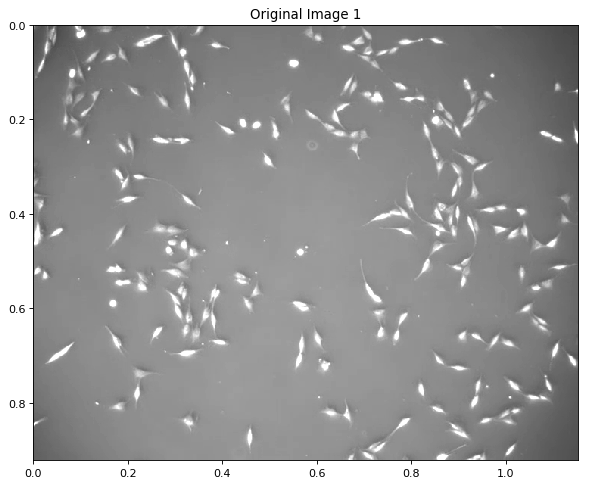

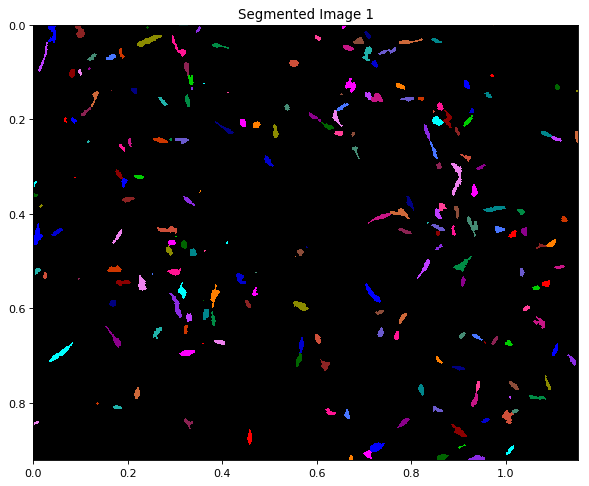

In [32]:
#get image
image_directory = os.path.join(".", "Images")
img1 = sitk.ReadImage(os.path.join(image_directory, "t001_PhC-C2DL-PSC.tif")) #sigma, level = 0.0001, 5700
img2 = sitk.ReadImage(os.path.join(image_directory, "t067_PhC-C2DL-PSC.tif"))
img3 = sitk.ReadImage(os.path.join(image_directory, "t162_PhC-C2DL-PSC.tif"))

#set watershed parameters
sigma, level = 0.0001, 5700

output1 = get_watershed_on_gradient(img1, sigma, level)
output2 = get_watershed_on_gradient(img2, sigma, level)
output3 = get_watershed_on_gradient(img3, sigma, level)

myshow(img1, "Original Image 1")
myshow(output1, "Segmented Image 1")
myshow(img2, "Original Image 1")
myshow(output2, "Segmented Image 1")
myshow(img3, "Original Image 1")
myshow(output3, "Segmented Image 1")